In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


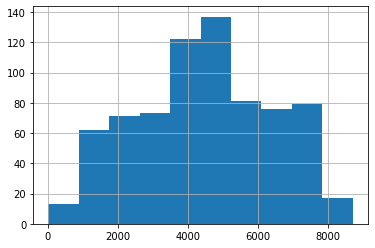

In [6]:
data['cnt'].hist();

In [8]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [9]:
X_df.shape

(731, 12)

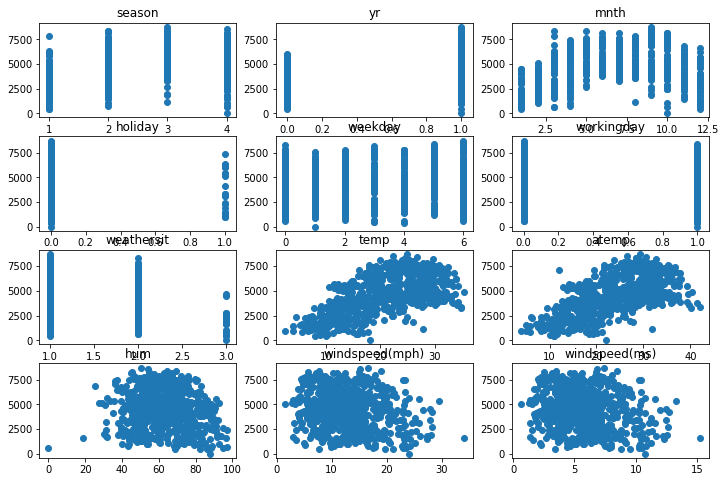

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

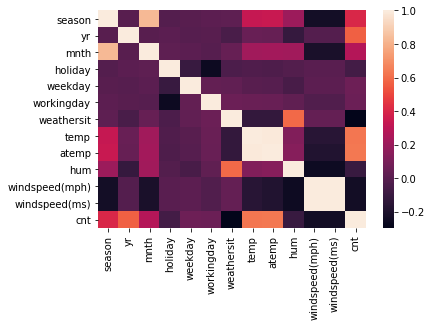

In [11]:
sns.heatmap(data.corr());

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV

In [13]:
ols = LinearRegression(normalize=True)

In [14]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train  = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train  = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
y_ols_pred = ols.predict(X_valid)

In [18]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [19]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)
    

In [20]:
rmse(y_valid, y_ols_pred)

1121.7955535920944

In [23]:
ols.coef_

array([ 3.73738182e+02,  2.11192537e+03,  9.01119545e+00, -4.13961647e+02,
        5.18556971e+01,  3.17015779e+01, -5.29199526e+02,  8.53668016e+00,
        1.11378159e+02, -1.04375155e+01, -5.80688403e+11,  1.29899996e+12])

In [21]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
windspeed(ms),1.299000e+12
yr,2.111925e+03
season,3.737382e+02
atemp,1.113782e+02
weekday,5.185570e+01
workingday,3.170158e+01
mnth,9.011195e+00
temp,8.536680e+00
hum,-1.043752e+01
holiday,-4.139616e+02


In [24]:
ridge = Ridge(random_state=17, normalize=True)

In [25]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=17, solver='auto', tol=0.001)

In [26]:
beatiful_coef(ridge.coef_)

,coef
yr,893.471708
season,122.291657
workingday,44.899153
temp,43.335021
atemp,40.730731
weekday,23.657447
mnth,16.580342
hum,-6.019385
windspeed(mph),-14.569916
windspeed(ms),-32.592903


In [27]:
ridge_valid_pred = ridge.predict(X_valid)

In [28]:
rmse(y_valid, ridge_valid_pred)

1694.1963161505407

In [29]:
alphas = np.logspace(-4, 4, 100)

In [30]:
ridge_cv = RidgeCV(alphas=alphas,
                   cv=5, normalize=True).fit(X_train, y_train)

In [31]:
ridge_cv.alpha_

0.012618568830660211

In [32]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [33]:
rmse(y_valid, best_ridge_valid_pred)

1118.803386608103

In [34]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [35]:
lasso.alpha_

0.09770099572992257

In [36]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [37]:
rmse(y_valid, best_lasso_valid_pred)

1120.7599048718082

In [38]:
beatiful_coef(lasso.coef_)

,coef
yr,2104.016880
season,371.889534
atemp,110.702588
weekday,50.803375
workingday,28.492832
temp,9.100711
mnth,8.227825
windspeed(ms),-0.000000
hum,-10.225836
windspeed(mph),-35.387183


In [39]:
beatiful_coef(ridge_cv.coef_)

,coef
yr,2086.883298
season,354.849868
atemp,70.048003
temp,52.872890
weekday,50.868024
workingday,34.406998
mnth,12.867755
hum,-10.225210
windspeed(mph),-18.579682
windspeed(ms),-41.562749


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [42]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

In [43]:
forest_valid_pred = forest.predict(X_valid)

In [44]:
rmse(y_valid, forest_valid_pred)

1053.805724969352

In [45]:
beatiful_coef(forest.feature_importances_)

,coef
temp,0.324132
atemp,0.216861
yr,0.200795
hum,0.067893
season,0.064054
weathersit,0.032349
mnth,0.028291
windspeed(ms),0.020298
weekday,0.018796
windspeed(mph),0.017695
